In [27]:

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import np_utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Dataset info data")
print("Train dataset size",X_train.shape)
print("Test dataset size",X_test.shape)

# inline plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

Dataset info data
Train dataset size (60000, 28, 28)
Test dataset size (10000, 28, 28)


# 1. Loading data

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_validation = int(X_train.shape[0] * 0.1)
num_training = X_train.shape[0] - num_validation

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

print ('X_train: ', X_train.shape)
print ('y_train: ', y_train.shape)
print ('X_val: ', X_val.shape)
print ('y_val: ', y_val.shape)
print ('X_test: ', X_test.shape)
print ('y_test: ', y_test.shape)

X_train:  (54000, 28, 28)
y_train:  (54000,)
X_val:  (6000, 28, 28)
y_val:  (6000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


#2 Reshaping Data

In [29]:
X_train_fc = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255
X_val_fc = X_val.reshape(X_val.shape[0], -1).astype('float32') / 255
X_test_fc = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255


In [30]:
nb_classes = len(np.unique(y_test))
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


#4 Creating Network Architecture

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_28 (Dense)                 (None, 32)            25120       dense_input_8[0][0]              
____________________________________________________________________________________________________
dense_29 (Dense)                 (None, 32)            1056        dense_28[0][0]                   
____________________________________________________________________________________________________
dense_30 (Dense)                 (None, 10)            330         dense_29[0][0]                   
Total params: 26506
____________________________________________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s - loss: 0.3490 - acc: 0.8925 - val_loss: 0.1566 - val_acc: 0.9

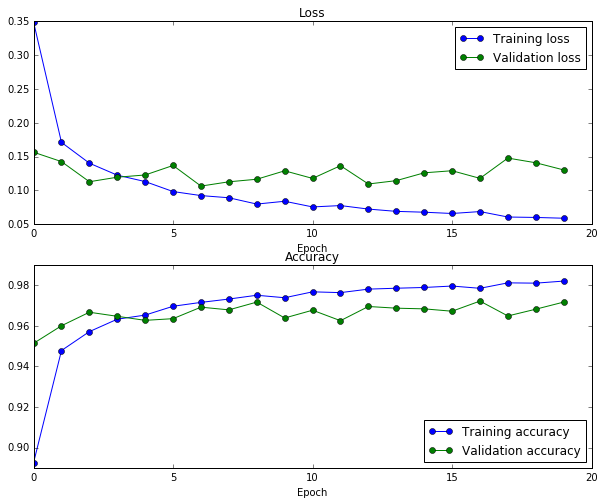

/anaconda/envs/PycharmEnv/lib/python3.5/site-packages/ipykernel/__main__.py:70: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/anaconda/envs/PycharmEnv/lib/python3.5/site-packages/ipykernel/__main__.py:71: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


'\nplt.figure()\nfor i, correct in enumerate(correct_indices[:9]):\n    plt.subplot(3,3,i+1)\n    plt.imshow(X_test[correct].reshape(28,28), cmap=\'gray\', interpolation=\'none\')\n    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))\n    \nplt.figure()\nfor i, incorrect in enumerate(incorrect_indices[:9]):\n    plt.subplot(3,3,i+1)\n    plt.imshow(X_test[incorrect].reshape(28,28), cmap=\'gray\', interpolation=\'none\')\n    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))\n'

In [31]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_fc.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))          
model.summary()

# 4.4 Specifying loss function and optimizer
# hyperparameters

# hyperparameters
lr = 0.1
momemtum = 0.9
batch_size = 128
nb_epoch = 20

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=lr, momentum=momemtum),
              metrics=['accuracy'])


# 4.5 Training the Model
#Hyper-parameters



start_time = time.time()

checkpoint_file = 'fc_weights.hdf5'
checkpointer = ModelCheckpoint(filepath=checkpoint_file, verbose=0, save_best_only=True)

history = model.fit(X_train_fc, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val_fc, Y_val),
                    callbacks=[checkpointer])


#history=model.fit(X_train, Y_train,batch_size=batch_size, nb_epoch=nb_epoch,\
#          show_accuracy=show_accuracy, verbose=1,\
#          validation_data=(X_test, Y_test))

print("Training required time is %s seconds" % (time.time() - start_time))


#score = model.evaluate(X_test, Y_test,show_accuracy=True, verbose=0)
#print('Test score:', score)

plt.subplot(2, 1, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'], '-o', label='Training accuracy')
plt.plot(history.history['val_acc'], '-o', label='Validation accuracy')
plt.legend(loc='lower right')
plt.show()



# 4.6 Inspecting Output
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
#predicted_classes = model.predict_classes(X_test)

predicted_classes_labels = model.predict(X_test_fc)
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes_labels == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes_labels != y_test)[0]


# Sklearn Metrics
'''
acc = metrics.accuracy_score(predicted_classes_labels, y_test)
f1 = metrics.f1_score(predicted_classes_labels, y_test)
precision = metrics.precision_score(predicted_classes_labels, y_test)
recall = metrics.recall_score(predicted_classes_labels, y_test)

print ('Logistic regresion accuracy: ',acc)
print ('Logistic regression F1-Score: ',f1)
print ('Logistic regression precision: ',precision)
print ('Logistic regression recall: ',recall)
'''

# 4.7 Visually checking output
'''
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
'''    
    




In [32]:
#from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: No module named 'pydot'